In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder # imported label encoder to encode the non numeric values 

In [3]:
from scipy import stats

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('Housing.csv');

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df.columns.tolist()

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
# Check the values in each column
for column in df.columns.tolist():
    if df[column].dtype != 'int64':
        display(df[column].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom
no     448
yes     97
Name: count, dtype: int64

basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [11]:
furnishingstatus_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_map)

In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,2


In [13]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype != 'int64':
        df[column] = label_encoder.fit_transform(df[column])

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [15]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

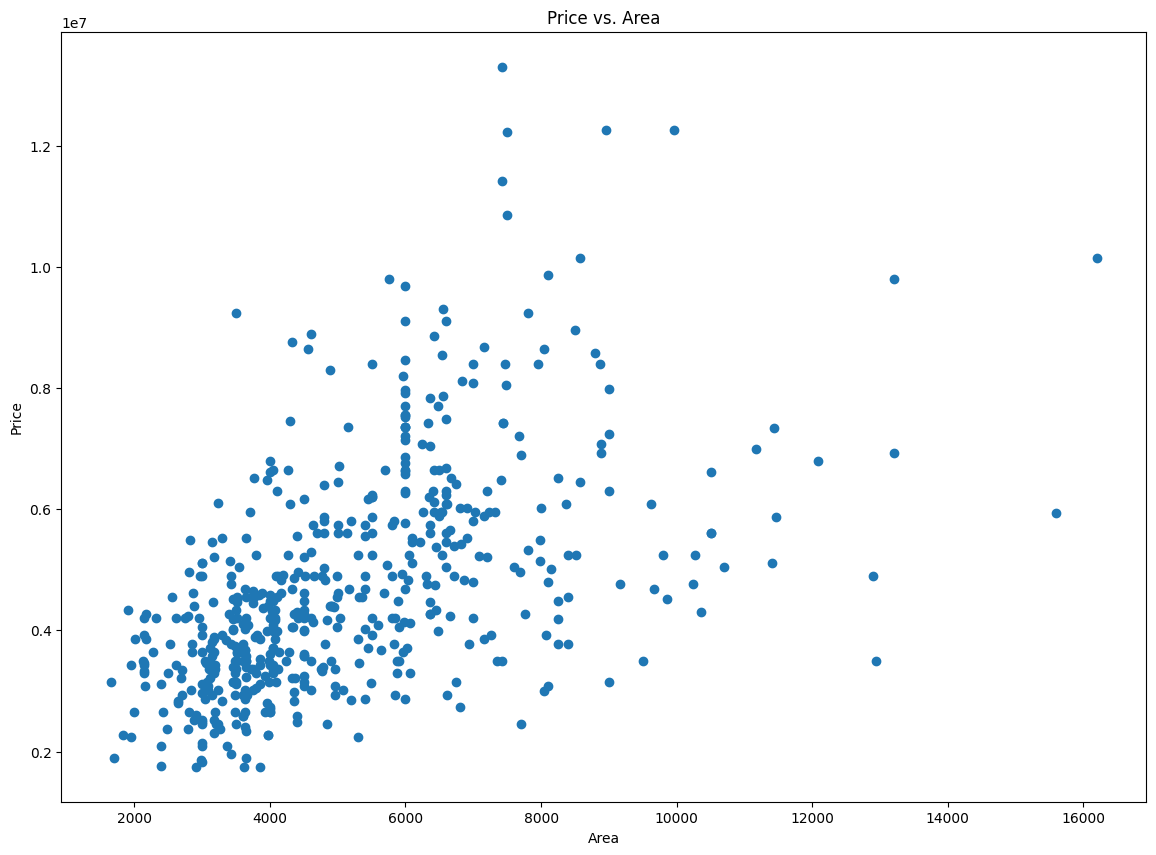

In [16]:
plt.figure(figsize=(14, 10))
plt.scatter(df['area'], df['price'])
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

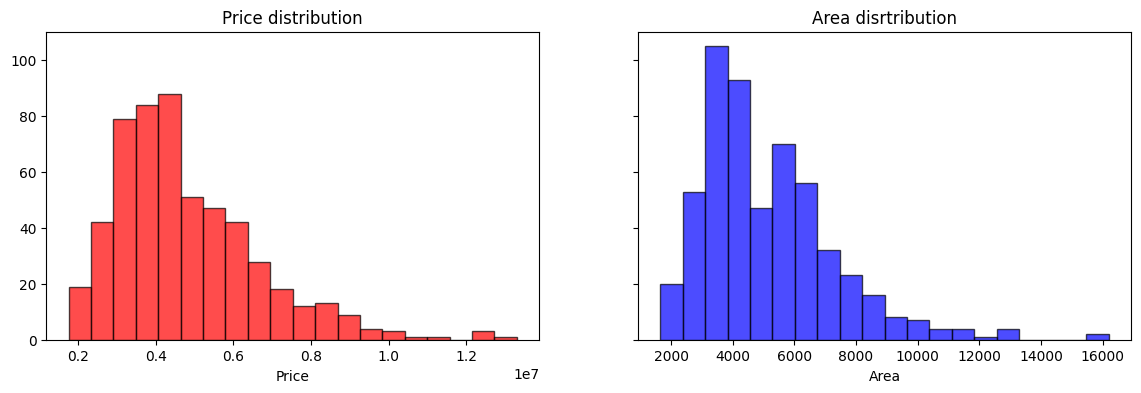

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=20, edgecolor='black', alpha=0.7, color='red')
plt.title('Price distribution')
plt.xlabel('Price')
plt.subplot(1, 2, 2)
plt.hist(df['area'], bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.title('Area disrtribution')
plt.xlabel('Area')
plt.show()

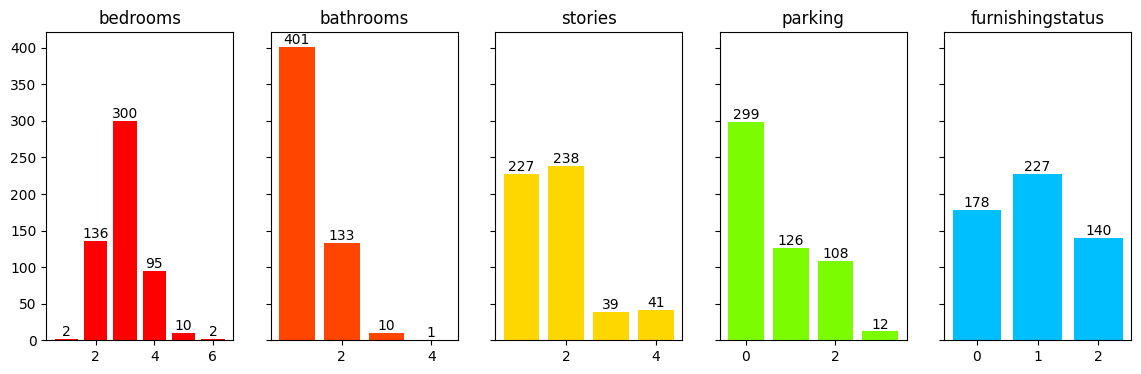

In [18]:
cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']
colors = ['red', 'orangered', 'gold', 'lawngreen', 'deepskyblue', 'blue']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4), sharey=True)
for i, column in enumerate(cols):
    plt.subplot(1, 5, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

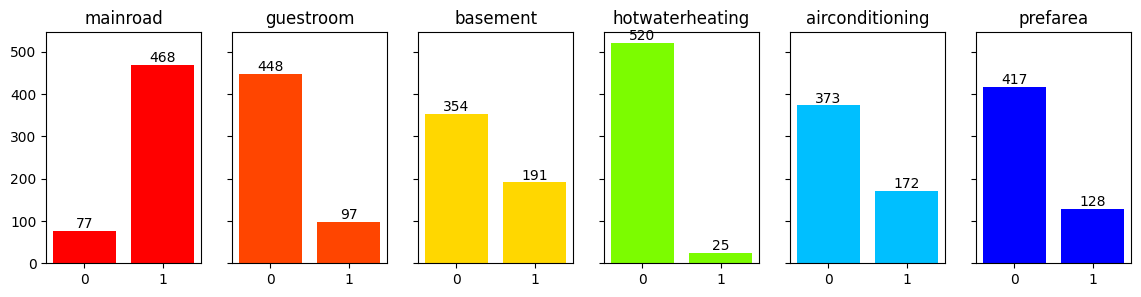

In [19]:
cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 3), sharey=True)
for i, column in enumerate(cols):
    plt.subplot(1, 6, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

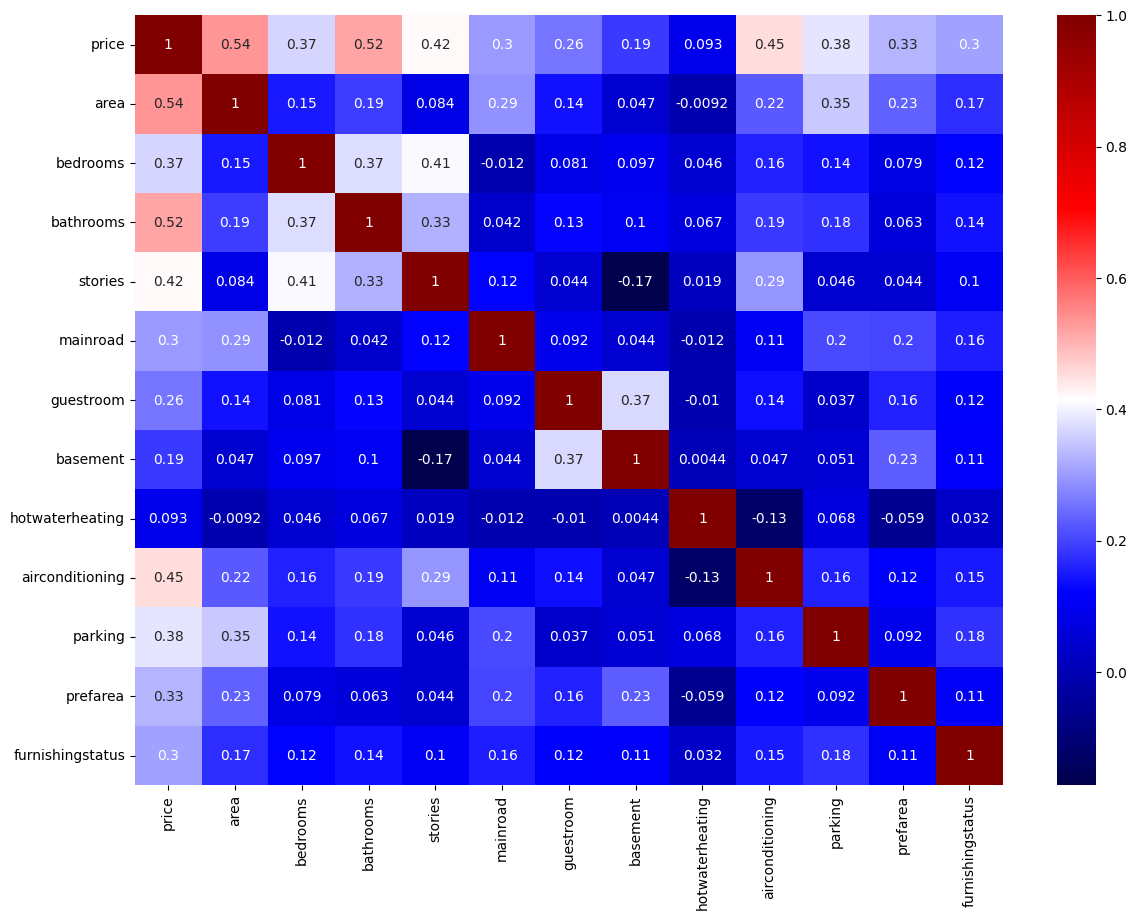

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

In [21]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [22]:
z_scores = pd.DataFrame(stats.zscore(df))

In [26]:
outliers = (z_scores > 3).any(axis=1)
df_preprocessed = df[~outliers]

In [27]:
# Separating the dataframe into the 2 parts
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

In [28]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,1,1,1,0,1,2,1,2
9,5750,3,2,4,1,1,0,0,1,1,1,0
12,6550,4,2,2,1,0,0,0,1,1,1,1
14,7800,3,2,2,1,0,0,0,0,0,1,1
15,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [29]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,1,1,1,0,1,2,1,2
9,5750,3,2,4,1,1,0,0,1,1,1,0
12,6550,4,2,2,1,0,0,0,1,1,1,1
14,7800,3,2,2,1,0,0,0,0,0,1,1
15,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [35]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# Standartizing the columns
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# for column in X.columns:
#     X_train[column] = scaler.fit_transform(np.array(X_train[column]).reshape(-1, 1))
# y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
# y_train = np.ravel(y_train)

In [36]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
382,3150,3,1,2,1,0,1,0,0,0,0,2
400,3512,2,1,1,1,0,0,0,0,1,1,0
134,7000,3,1,1,1,0,1,0,0,2,1,1
65,8880,3,2,2,1,0,1,0,1,1,0,2
495,4000,3,1,2,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,3640,3,1,2,1,0,0,0,1,0,0,2
88,7410,3,1,1,1,1,1,0,1,2,1,0
40,6550,3,1,2,1,0,1,0,1,0,1,2
227,6000,2,1,1,1,0,1,0,1,1,0,2


In [37]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 747784661551.8704
Mean Absolute Error: 647939.0362590362
R-squared: 0.7024229047110888


In [38]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 607194834893.2855
Mean Absolute Error: 610304.317
R-squared: 0.7583699097718917


In [39]:
xgb = RandomForestRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 648876133841.403
Mean Absolute Error: 630424.2559999999
R-squared: 0.741783049267012
